In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r'C:\Users\D\Desktop\car data.csv')


In [14]:
nd=df[df['Owner']==1]
nd

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
58,etios g,2014,4.10,6.80,39485,Petrol,Dealer,Manual,1
106,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
191,Bajaj Discover 125,2012,0.20,0.57,25000,Petrol,Individual,Manual,1
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1
193,Hero Ignitor Disc,2013,0.20,0.65,24000,Petrol,Individual,Manual,1
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
205,grand i10,2016,5.25,5.70,3493,Petrol,Dealer,Manual,1
241,xcent,2015,4.75,7.13,35866,Petrol,Dealer,Manual,1


In [13]:
df.sample(8)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
238,verna,2013,4.80,9.40,60241,Petrol,Dealer,Manual,0
281,city,2006,2.10,7.60,50456,Petrol,Dealer,Manual,0
176,Honda Karizma,2011,0.35,1.05,30000,Petrol,Individual,Manual,0
216,eon,2016,2.90,4.43,12500,Petrol,Dealer,Manual,0
78,corolla altis,2010,5.25,22.83,80000,Petrol,Dealer,Automatic,0
23,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
140,Honda CBR 150,2013,0.60,1.20,32000,Petrol,Individual,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [18]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# encoding "Fuel_Type" Column


In [21]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [23]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [25]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']


In [26]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.590,27000,0,0,0,0
1,2013,9.540,43000,1,0,0,0
2,2017,9.850,6900,0,0,0,0
3,2011,4.150,5200,0,0,0,0
4,2014,6.870,42450,1,0,0,0
5,2018,9.830,2071,1,0,0,0
6,2015,8.120,18796,0,0,0,0
7,2015,8.610,33429,1,0,0,0
8,2016,8.890,20273,1,0,0,0
9,2015,8.920,42367,1,0,0,0


In [60]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
5       9.25
6       6.75
7       6.50
8       8.75
9       7.45
10      2.85
11      6.85
12      7.50
13      6.10
14      2.25
15      7.75
16      7.25
17      7.75
18      3.25
19      2.65
20      2.85
21      4.90
22      4.40
23      2.50
24      2.90
25      3.00
26      4.15
27      6.00
28      1.95
29      7.45
30      3.10
31      2.35
32      4.95
33      6.00
34      5.50
35      2.95
36      4.65
37      0.35
38      3.00
39      2.25
40      5.85
41      2.55
42      1.95
43      5.50
44      1.25
45      7.50
46      2.65
47      1.05
48      5.80
49      7.75
50     14.90
51     23.00
52     18.00
53     16.00
54      2.75
55      3.60
56      4.50
57      4.75
58      4.10
59     19.99
60      6.95
61      4.50
62     18.75
63     23.50
64     33.00
65      4.75
66     19.75
67      9.25
68      4.35
69     14.25
70      3.95
71      4.50
72      7.45
73      2.65
74      4.90
75      3.95
76      5.50

# training our model

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)


# linear regression

In [29]:
from sklearn.linear_model import LinearRegression
# loading the linear regression model
lin_reg_model = LinearRegression()


In [30]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [47]:
# prediction on Training data
y_pred = lin_reg_model.predict(X_test)


In [49]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared Error : ", error_score)


R squared Error :  0.8365861023212335


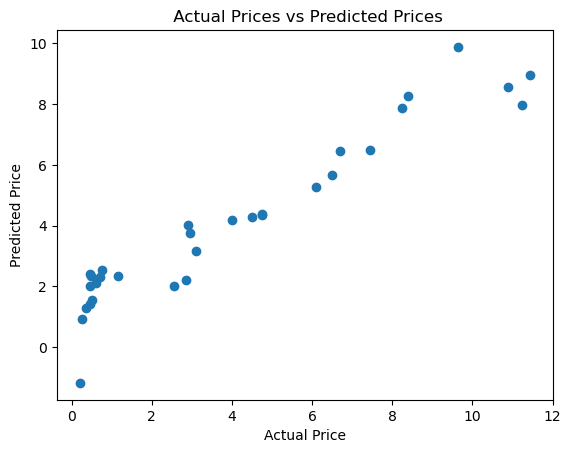

In [54]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


# lasso regression 

In [44]:
from sklearn.linear_model import Lasso


In [45]:
lass_reg_model = Lasso()


In [46]:
lass_reg_model.fit(X_train,Y_train)


Lasso()

In [50]:
# prediction on Training data
y_pred = lass_reg_model.predict(X_test)


In [52]:
# R squared Error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared Error : ", error_score)


R squared Error :  0.8709763132343395


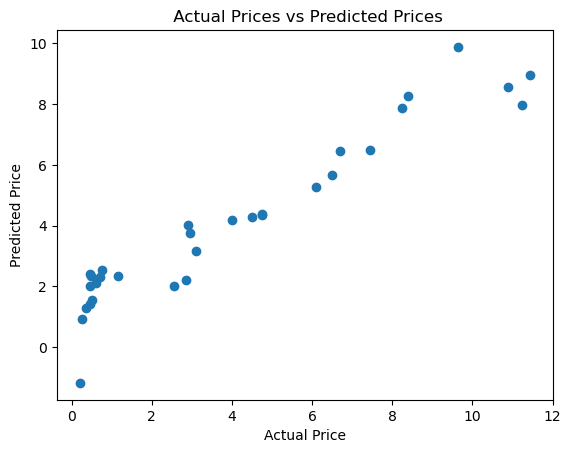

In [53]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
